In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [71]:
df = pd.read_excel(r"../data/vrpp_ready.xlsx")


In [72]:
df.head()

,Berth ID,Vessel ID,Local Port,Remote Port,Trade,Container Type,ETA,ETD,Has Dasngerous Cargo,Dry/Reefer,...,Arrival Date,Sailing Date,Containers,Delay Duration,Service Days,TEU,Delay_Status,Sailing Season,Load Factors,Load_Category
0,1,Vessel_001,BREMERHAVEN,NANSHA,SOUTH CHINA + HONG KONG,40HC,2025-01-03,2025-01-05,False,Dry,...,2024-12-31,2025-01-01,1,4.00:00:00,5,2,Major Delay,Winter,2,High
1,2,Vessel_001,FELIXSTOWE,NANSHA,SOUTH CHINA + HONG KONG,40HC,2025-01-03,2025-01-05,False,Dry,...,2024-12-31,2025-01-01,1,4.00:00:00,5,2,Major Delay,Winter,2,High
2,3,Vessel_001,HAMBURG,NANSHA,SOUTH CHINA + HONG KONG,45HC,2025-01-06,2025-01-09,False,Dry,...,2025-01-02,2025-01-05,1,4.00:00:00,7,1,Major Delay,Winter,1,Low
3,4,Vessel_001,HAMBURG,NANSHA,SOUTH CHINA + HONG KONG,20DV,2025-01-06,2025-01-09,False,Dry,...,2025-01-02,2025-01-05,1,4.00:00:00,7,1,Major Delay,Winter,1,Low
4,4,Vessel_001,HAMBURG,NANSHA,SOUTH CHINA + HONG KONG,20DV,2025-01-06,2025-01-09,False,Dry,...,2025-01-02,2025-01-05,1,4.00:00:00,7,1,Major Delay,Winter,1,Low


In [73]:
# Numerical summary
numeric_df = df.select_dtypes(include=np.number)

desc = numeric_df.describe().T
desc["missing"] = df[numeric_df.columns].isnull().sum()
desc["unique"] = df[numeric_df.columns].nunique()
display(desc)

,count,mean,std,min,25%,50%,75%,max,missing,unique
Berth ID,374642.0,2.503462,1.118388,1.0,2.00000,3.000,4.0,4.00000,0,4
Container Size,374642.0,33.270028,9.466508,20.0,20.00000,40.000,40.0,45.00000,0,3
Weight KGS,374642.0,64978.555018,126601.054429,0.1,9529.83225,21527.324,53929.5,819614.15775,0,222361
Containers,374642.0,4.169621,8.906423,1.0,1.00000,1.000,4.0,417.00000,0,220
Service Days,374642.0,6.862637,6.880484,0.0,2.00000,5.000,9.0,365.00000,0,90
TEU,374642.0,6.532314,11.043305,1.0,2.00000,2.000,6.0,72.00000,0,72
Load Factors,374642.0,1.660428,0.473565,1.0,1.00000,2.000,2.0,2.00000,0,2


In [74]:
# Categorical summary
cat_df = df.select_dtypes(include=["object", "bool"])
for col in cat_df.columns:
    print(f"\n{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts().head(5))


Vessel ID: 8684 unique values
Vessel ID
Vessel_334     1601
Vessel_1084    1295
Vessel_1080    1210
Vessel_529     1189
Vessel_990     1111
Name: count, dtype: int64

Local Port: 338 unique values
Local Port
HAMBURG        72709
BREMERHAVEN    50660
ANTWERP        28204
ROTTERDAM      24422
GDANSK         23359
Name: count, dtype: int64

Remote Port: 454 unique values
Remote Port
SHANGHAI          26360
NINGBO            22953
YANTIAN           16112
QINGDAO           15299
TIANJINXINGANG     9330
Name: count, dtype: int64

Trade: 37 unique values
Trade
NORTH CHINA                77552
SOUTH CHINA + HONG KONG    33712
SOUTH EAST ASIA            32335
NORTH INDIA + PAKISTAN     19583
EAST MEDITERRANEAN         19343
Name: count, dtype: int64

Container Type: 25 unique values
Container Type
40HC    194613
20DV    122191
40DV     27926
40HR     21783
20RE      1595
Name: count, dtype: int64

Has Dasngerous Cargo: 2 unique values
Has Dasngerous Cargo
False    354322
True      20320
Name: 

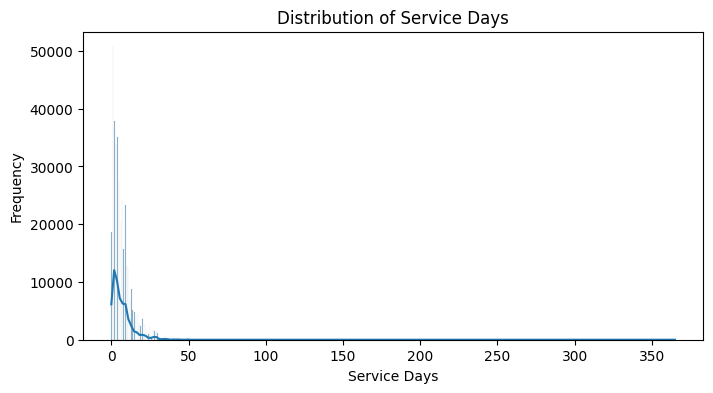

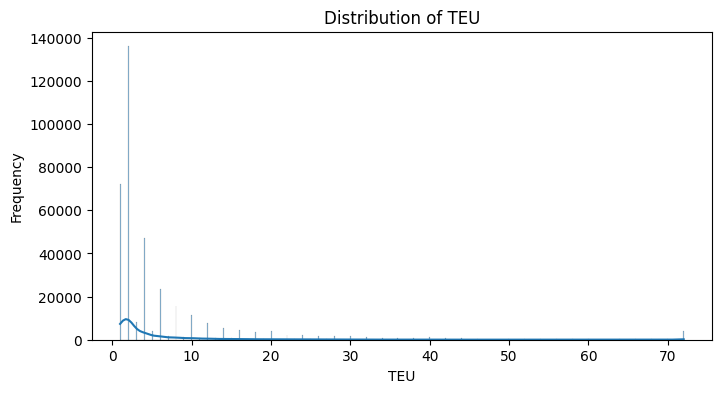

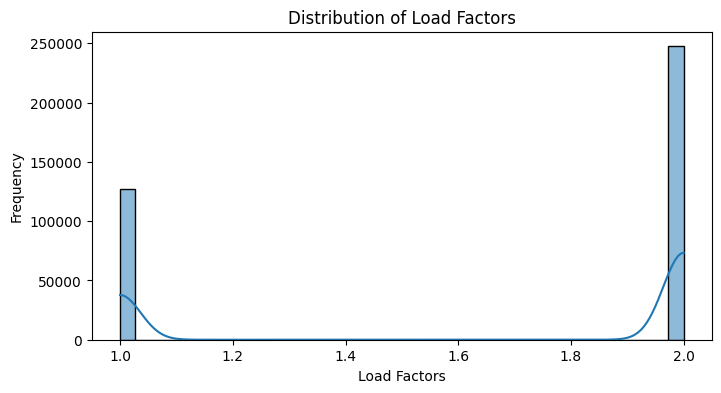

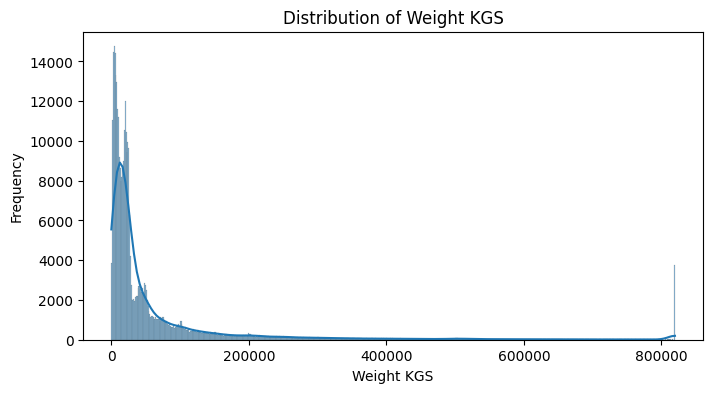

In [75]:
# Delay patterns
features = ["Service Days", "TEU", "Load Factors", "Weight KGS"]
for col in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

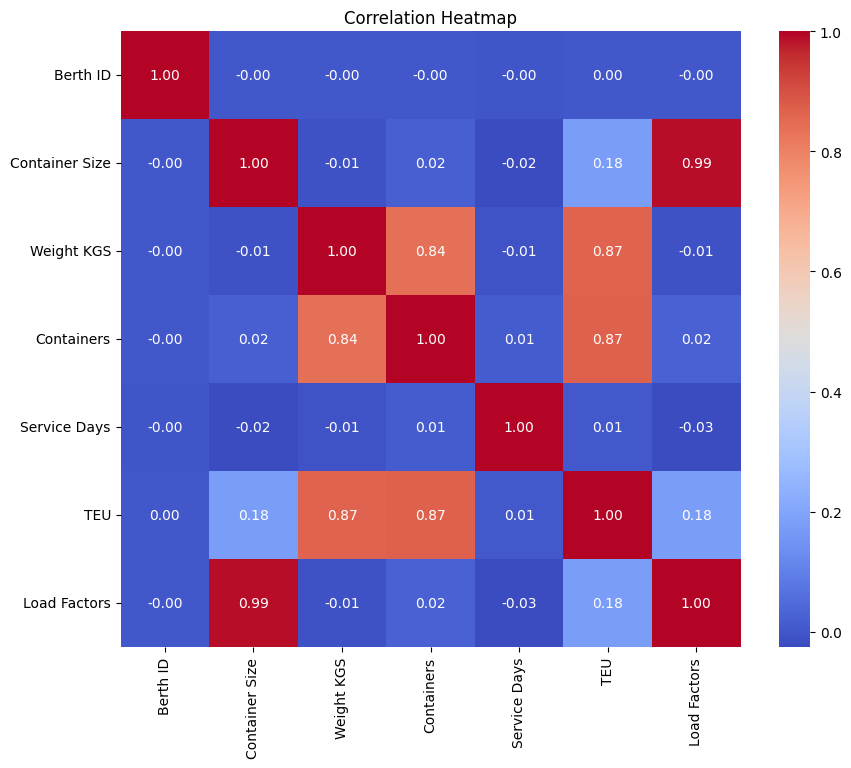

In [76]:
# Correlation
corr = numeric_df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

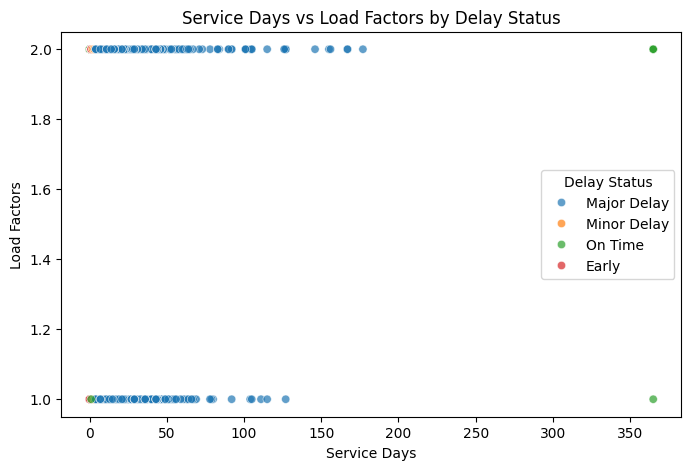

In [78]:
# Delay Duration vs Service Days
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="Service Days", y="Load Factors", hue="Delay_Status", alpha=0.7)
plt.title("Service Days vs Load Factors by Delay Status")
plt.xlabel("Service Days")
plt.ylabel("Load Factors")
plt.legend(title="Delay Status")
plt.show()

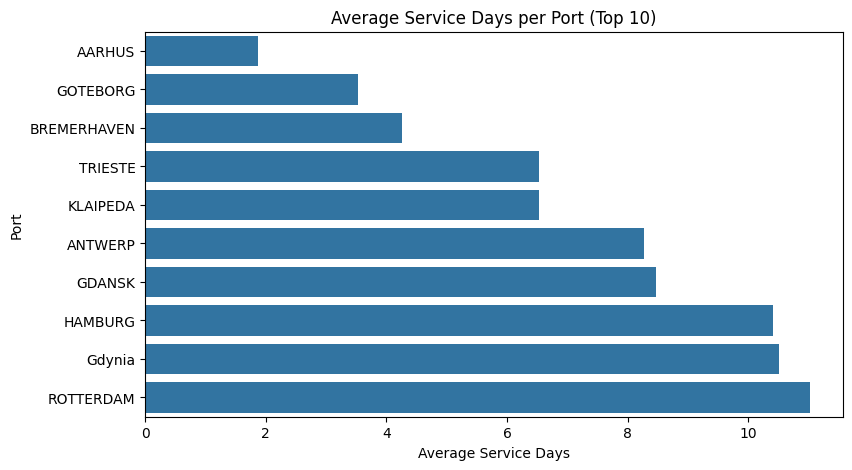

In [79]:
# Average service days per port
top_ports = df["Local Port"].value_counts().head(10).index
avg_service = df[df["Local Port"].isin(top_ports)].groupby("Local Port")["Service Days"].mean().sort_values()

plt.figure(figsize=(9,5))
sns.barplot(x=avg_service.values, y=avg_service.index)
plt.title("Average Service Days per Port (Top 10)")
plt.xlabel("Average Service Days")
plt.ylabel("Port")
plt.show()


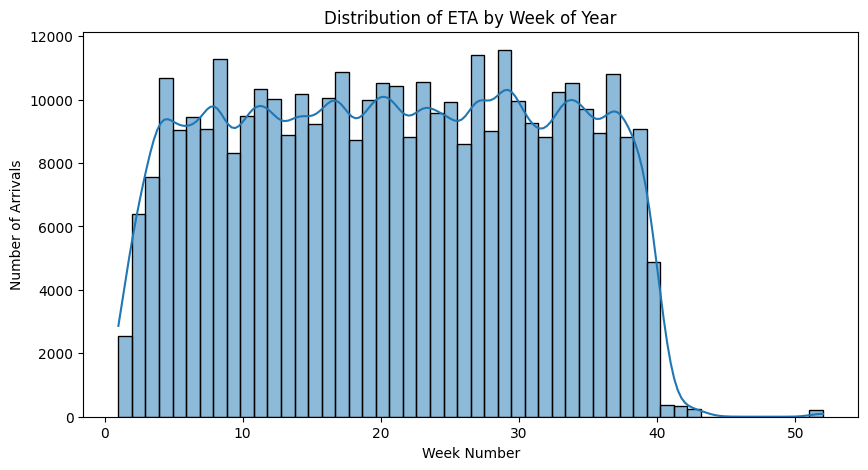

In [80]:
# ETA distribution by week of year
df["ETA_week"] = df["ETA"].dt.isocalendar().week

plt.figure(figsize=(10,5))
sns.histplot(df["ETA_week"], bins=52, kde=True)
plt.title("Distribution of ETA by Week of Year")
plt.xlabel("Week Number")
plt.ylabel("Number of Arrivals")
plt.show()


C:\Users\maxdo\AppData\Local\Temp\ipykernel_24764\3382698811.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Sailing Season", y="Load Factors", estimator="mean", ci=None)


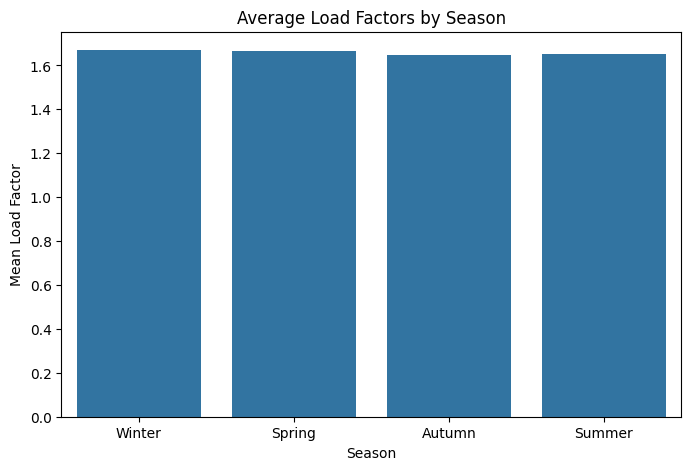

In [82]:
# Average Load Factors by Season
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="Sailing Season", y="Load Factors", estimator="mean", ci=None)
plt.title("Average Load Factors by Season")
plt.xlabel("Season")
plt.ylabel("Mean Load Factor")
plt.show()


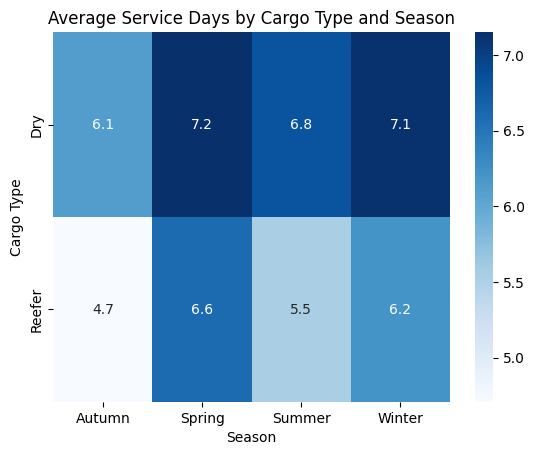

In [83]:
# Cargo Type vs Service Days by Season
pivot = df.pivot_table(
    values="Service Days",
    index="Dry/Reefer",
    columns="Sailing Season",
    aggfunc="mean"
)

sns.heatmap(pivot, annot=True, fmt=".1f", cmap="Blues")
plt.title("Average Service Days by Cargo Type and Season")
plt.xlabel("Season")
plt.ylabel("Cargo Type")
plt.show()


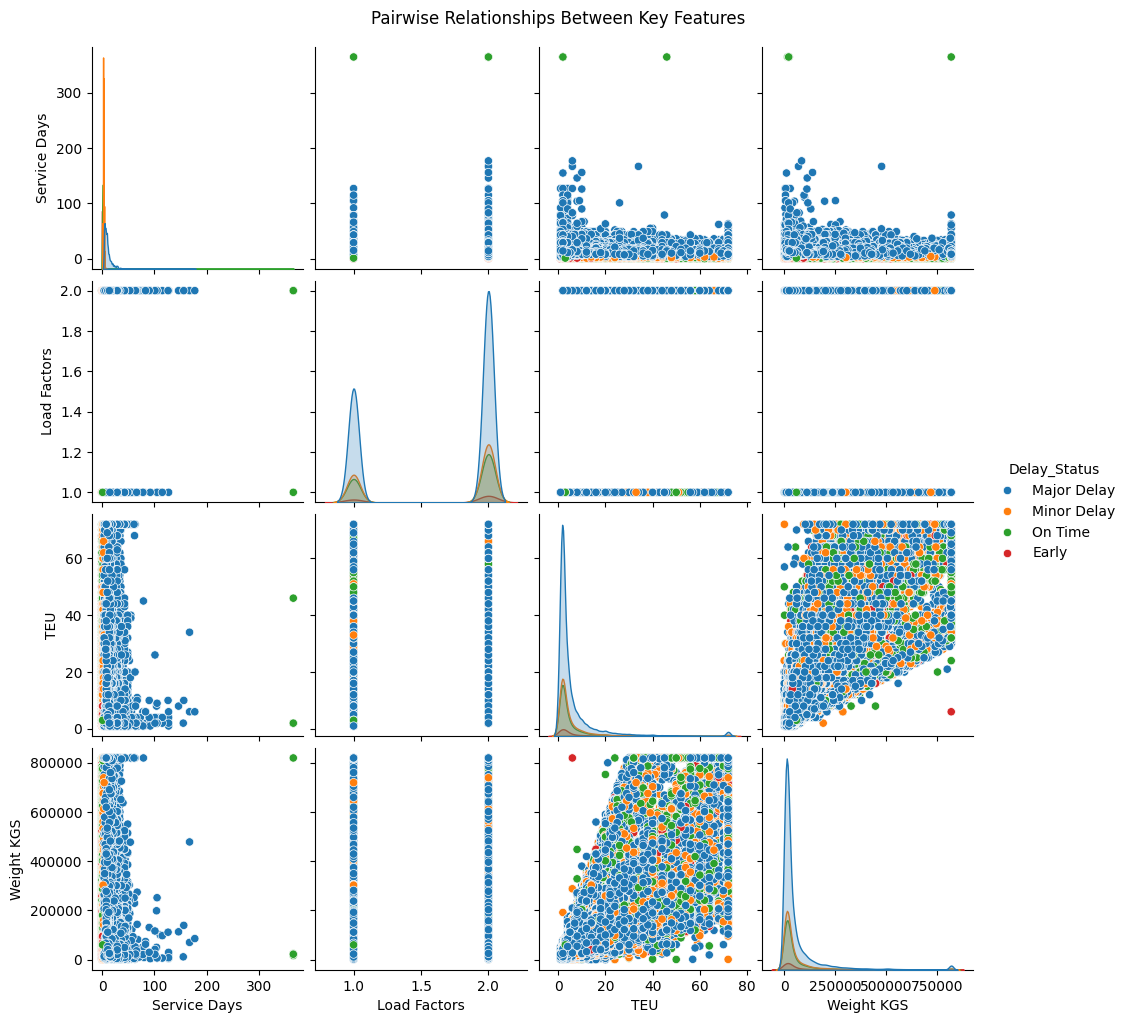

In [84]:
#Pairwise Relationships Between Key Features
sns.pairplot(df[["Service Days", "Load Factors", "TEU", "Weight KGS", "Delay_Status"]], hue="Delay_Status")
plt.suptitle("Pairwise Relationships Between Key Features", y=1.02)
plt.show()
